# Atividade A

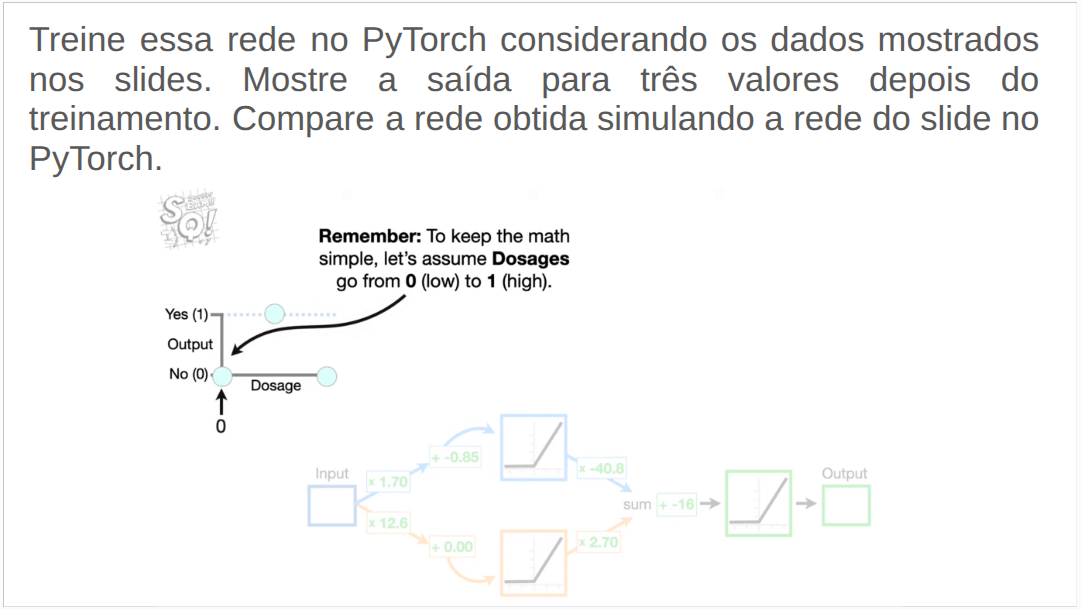

In [44]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/A.png", width=950))

In [46]:
# Segundo metodo de resolução do problema

# Importando as bibliotecas 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [68]:
# Dados
x_data = torch.tensor([[0.0], [0.5], [1.0]])
y_true = torch.tensor([[0.0], [1.0], [0.0]])

x_data_test = torch.tensor([[0.4], [0.5], [0.6]])
y_true_test = torch.tensor([[1.0], [1.0], [1.0]])

In [69]:
# Reprodutibilidade
torch.manual_seed(2)

# Rede
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 2)
        self.output = nn.Linear(2, 1)
        nn.init.normal_(self.hidden.weight, mean=0.0, std=1.0)
        nn.init.normal_(self.hidden.bias, mean=0.0, std=1.0)
        nn.init.normal_(self.output.weight, mean=0.0, std=1.0)
        nn.init.normal_(self.output.bias, mean=0.0, std=1.0)

    def forward(self, x):
        x = F.relu(self.hidden(x))   # Ativação ReLU
        return self.output(x)

# Instanciar modelo e otimizador
model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

# Treinamento
for epoch in range(2000):  # aumentamos para garantir convergência
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_data)
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Verificando os novos valores
print("\nParâmetros encontrados:")
print(f"w1: {model.hidden.weight[0][0].item():.4f}, w2: {model.hidden.weight[1][0].item():.4f}")
print(f"b1: {model.hidden.bias[0].item():.4f}, b2: {model.hidden.bias[1].item():.4f}")
print(f"w3: {model.output.weight[0][0].item():.4f}, w4: {model.output.weight[0][1].item():.4f}")
print(f"b3: {model.output.bias[0].item():.4f}")

Epoch 0: Loss = 0.312965
Epoch 200: Loss = 0.000000
Epoch 400: Loss = 0.000000
Epoch 600: Loss = 0.000000
Epoch 800: Loss = 0.000000
Epoch 1000: Loss = 0.000000
Epoch 1200: Loss = 0.000000
Epoch 1400: Loss = 0.000386
Epoch 1600: Loss = 0.000000
Epoch 1800: Loss = 0.000000

Parâmetros encontrados:
w1: 1.4129, w2: -1.9485
b1: -0.5105, b2: 0.7999
w3: -1.4156, w4: -1.5967
b3: 1.2773


In [70]:
# Teste
model.eval()
with torch.no_grad():
    print("\n--- Teste com os dados de treino ---")
    y_pred_train = model(x_data)
    for i, x in enumerate(x_data):
        print(f"x = {x.item():.2f} | y_true = {y_true[i].item():.2f} | y_pred = {y_pred_train[i].item():.4f}")

    print("\n--- Teste com os dados de generalização ---")
    y_pred_test = model(x_data_test)
    for i, x in enumerate(x_data_test):
        print(f"x = {x.item():.2f} | y_test_true = {y_true_test[i].item():.2f} | y_pred = {y_pred_test[i].item():.4f}")



--- Teste com os dados de treino ---
x = 0.00 | y_true = 0.00 | y_pred = -0.0000
x = 0.50 | y_true = 1.00 | y_pred = 1.0000
x = 1.00 | y_true = 0.00 | y_pred = -0.0000

--- Teste com os dados de generalização ---
x = 0.40 | y_test_true = 1.00 | y_pred = 1.1672
x = 0.50 | y_test_true = 1.00 | y_pred = 1.0000
x = 0.60 | y_test_true = 1.00 | y_pred = 0.8000


In [50]:
# Criando o modelo
model = SimpleNN()

# Dados de exemplo (substitua pelos seus dados reais)
x_data = torch.tensor([[0.0], [0.5], [1.0]])
y_true = torch.tensor([[0.0], [1.0], [0.0]])

# Atribuindo novos valores após a criação
def set_custom_weights(model):
    with torch.no_grad():
        # Camada hidden
        model.hidden.weight[0][0].copy_(torch.tensor(1.70))

        model.hidden.weight[0][0].copy_(torch.tensor(1.70))  # w1
        model.hidden.weight[1][0].copy_(torch.tensor(12.6))  # w2
        model.hidden.bias[0].copy_(torch.tensor(-0.85))        # b1
        model.hidden.bias[1].copy_(torch.tensor(0.0))       # b2
        
        # Camada output
        model.output.weight[0][0].copy_(torch.tensor(-40.8))   # w3
        model.output.weight[0][1].copy_(torch.tensor(2.70))  # w4
        model.output.bias[0].copy_(torch.tensor(-16.0))        # b3

# Aplicando os novos pesos
set_custom_weights(model)

# Verificando os novos valores
print("\nParâmetros após modificação:")
print(f"w1: {model.hidden.weight[0][0].item():.4f}, w2: {model.hidden.weight[1][0].item():.4f}")
print(f"b1: {model.hidden.bias[0].item():.4f}, b2: {model.hidden.bias[1].item():.4f}")
print(f"w3: {model.output.weight[0][0].item():.4f}, w4: {model.output.weight[0][1].item():.4f}")
print(f"b3: {model.output.bias[0].item():.4f}")



Parâmetros após modificação:
w1: 1.7000, w2: 12.6000
b1: -0.8500, b2: 0.0000
w3: -40.8000, w4: 2.7000
b3: -16.0000


In [55]:
x_data_test = torch.tensor([[0.4], [0.5], [0.6]])
y_true_test = torch.tensor([[1.0], [1.0], [1.0]])

# Apenas inferência
model.eval()
with torch.no_grad():
    print("\n--- Teste com os dados de treino ---")
    y_pred_train = model(x_data)
    for i, x in enumerate(x_data):
        print(f"x = {x.item():.2f} | y_true = {y_true[i].item():.2f} | y_pred = {y_pred_train[i].item():.4f}")

    print("\n--- Teste com os dados de generalização ---")
    y_pred_test = model(x_data_test)
    for i, x in enumerate(x_data_test):
        print(f"x = {x.item():.2f} | y_test_true = {y_true_test[i].item():.2f} | y_pred = {y_pred_test[i].item():.4f}")



--- Teste com os dados de treino ---
x = 0.00 | y_true = 0.00 | y_pred = -16.0000
x = 0.50 | y_true = 1.00 | y_pred = 1.0100
x = 1.00 | y_true = 0.00 | y_pred = -16.6600

--- Teste com os dados de generalização ---
x = 0.40 | y_test_true = 1.00 | y_pred = -2.3920
x = 0.50 | y_test_true = 1.00 | y_pred = 1.0100
x = 0.60 | y_test_true = 1.00 | y_pred = -2.5240


### Conclusão 

A rede treinada do zero foi capaz de convergir para o pico máximo da função, atingindo o valor de 0.5 quando $𝑌=1$. No entanto, devido à concentração do treinamento nas regiões de pico e nas extremidades, com poucas amostras representando a região central, o modelo apresentou sinais de overfitting. Isso resultou em uma menor capacidade de generalização, com desempenho inferior fora do centro, embora não tenha ocorrido uma queda expressiva em comparação à rede configurada com os melhores parâmetros.

# Atividade B

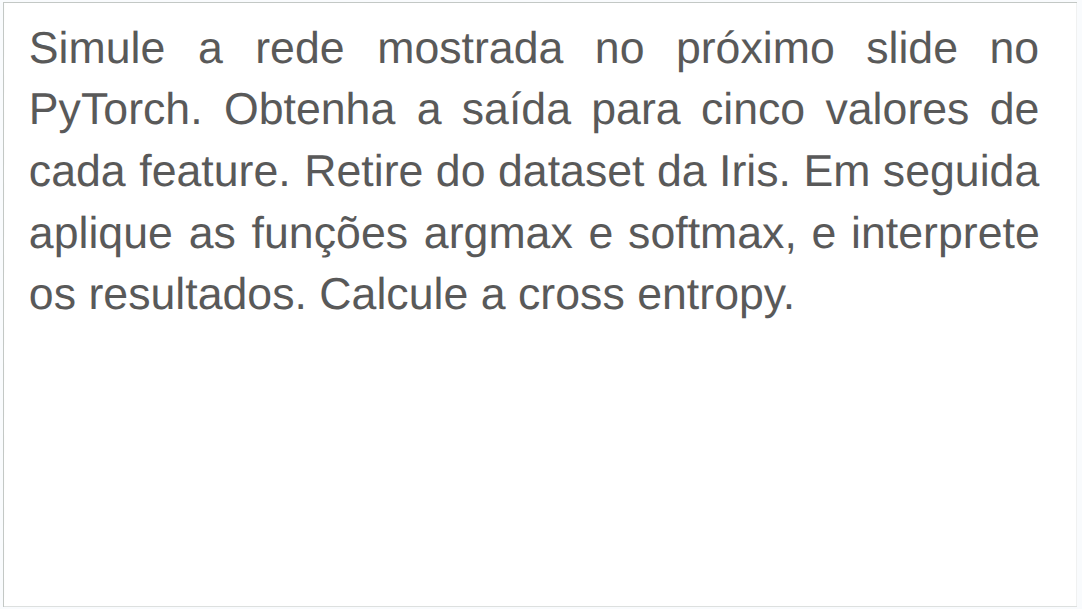

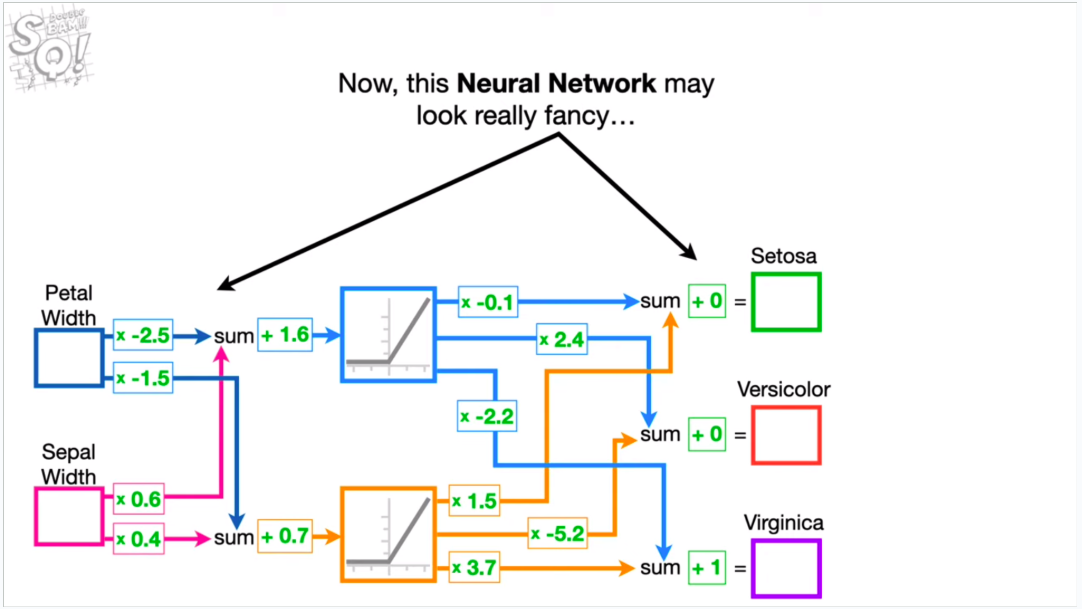

In [57]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/B1.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/B2.png", width=950))
print("")  # Espaço entre as imagens

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris

class CustomNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Camada oculta: 2 entradas -> 2 neurônios
        self.hidden = nn.Linear(2, 2)
        # Camada de saída: 2 neurônios -> 3 saídas
        self.output = nn.Linear(2, 3)
        
        # Inicialização manual dos pesos (opcional)
        with torch.no_grad():
            # Pesos camada oculta (4 pesos)
            self.hidden.weight.data = torch.tensor([[-2.5, -1.5],  # w1, w2
                                                   [0.6, 0.4]]) # w3, w4
            # Bias camada oculta (2 bias)
            self.hidden.bias.data = torch.tensor([1.6, 0.7]) # b1, b2
            
            # Pesos camada saída (6 pesos)
            self.output.weight.data = torch.tensor([[-0.1, 2.4],  # w5, w6
                                                  [-2.2, 1.5],  # w7, w8
                                                  [-5.2, 3.7]]) # w9, w10
            # Bias camada saída (3 bias)
            self.output.bias.data = torch.tensor([0.0, 0.0, 1.0]) # b3, b4, b5

    def forward(self, x):
        x = F.relu(self.hidden(x))  # Aplica ReLU após a camada oculta
        x = self.output(x)          # Saída linear (sem ativação)
        return x

# Exemplo de uso
model = CustomNN()
print("Estrutura da rede:")
print(model)

# Contagem de parâmetros
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal de parâmetros: {total_params}")

Estrutura da rede:
CustomNN(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=3, bias=True)
)

Total de parâmetros: 15


In [ ]:
# 1. Carregar o dataset
iris = load_iris()
dados_iris = iris.data
rotulos_iris = iris.target

# 2. Selecionar apenas as features: sepal width (índice 1) e petal width (índice 3)
features_escolhidas = dados_iris[:, [1, 3]]

# 3. Selecionar 5 amostras específicas
indices_amostras = [0, 50, 100, 10, 120]
X_amostras = features_escolhidas[indices_amostras]
y_amostras = rotulos_iris[indices_amostras]

# 4. Converter as amostras para tensor do PyTorch
X_tensor = torch.tensor(X_amostras, dtype=torch.float32)

# 5. Definir os nomes das classes
classes = ['setosa', 'versicolor', 'virginica']

# 6. Instanciar o modelo (assumindo que CustomNN está definido em outro lugar)
model = CustomNN()
model.eval()

# 7. Fazer predição
with torch.no_grad():
    logits = model(X_tensor)               # Saídas brutas
    probs = torch.softmax(logits, dim=1)   # Probabilidades
    preds = torch.argmax(probs, dim=1)     # Índices das classes

# 8. Mostrar resultados com probabilidades
print("\nResultados das previsões:")
for i in range(len(X_amostras)):
    entrada = X_amostras[i]
    real = classes[y_amostras[i]]
    previsto = classes[preds[i]]
    
    # Formatando as probabilidades para cada classe
    prob_setosa = probs[i][0].item() * 100
    prob_versicolor = probs[i][1].item() * 100
    prob_virginica = probs[i][2].item() * 100
    
    print(f"\nAmostra {i+1}: entrada={entrada}")
    print(f"Classe real: {real}")
    print(f"Classe prevista: {previsto}")
    print("Probabilidades:")
    print(f"  Setosa: {prob_setosa:.2f}%")
    print(f"  Versicolor: {prob_versicolor:.2f}%")
    print(f"  Virginica: {prob_virginica:.2f}%")


Resultados das previsões:

Amostra 1: entrada=[3.5 0.2]
Classe real: setosa
Classe prevista: virginica
Probabilidades:
  Setosa: 0.86%
  Versicolor: 0.06%
  Virginica: 99.07%

Amostra 2: entrada=[3.2 1.4]
Classe real: versicolor
Classe prevista: virginica
Probabilidades:
  Setosa: 0.59%
  Versicolor: 0.03%
  Virginica: 99.38%

Amostra 3: entrada=[3.3 2.5]
Classe real: virginica
Classe prevista: virginica
Probabilidades:
  Setosa: 0.31%
  Versicolor: 0.01%
  Virginica: 99.68%

Amostra 4: entrada=[3.7 0.2]
Classe real: setosa
Classe prevista: virginica
Probabilidades:
  Setosa: 0.74%
  Versicolor: 0.05%
  Virginica: 99.21%

Amostra 5: entrada=[3.2 2.3]
Classe real: virginica
Classe prevista: virginica
Probabilidades:
  Setosa: 0.37%
  Versicolor: 0.02%
  Virginica: 99.62%


### Conclusão

É possível observar que, com os parâmetros definidos no slide, a rede simulada com 2 entradas, 1 camada oculta e 3 saídas não está devidamente ajustada. Isso fica evidente pelo fato de a rede estar prevendo apenas a classe Virginica, indicando que os pesos atuais não estão permitindo uma separação adequada entre as três classes.

# Atividade C

In [42]:
import numpy as np

# --- Funções de Ativação e Perda Manuais ---

def relu(x):
    """Implementa a função de ativação ReLU."""
    return np.maximum(0, x)

def softmax(x):
    """
    Implementa a função Softmax para converter logits em probabilidades.
    Adiciona um pequeno valor (epsilon) para estabilidade numérica.
    """
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True)) # Subtrai max para evitar overflow
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(predictions, targets):
    """
    Calcula a perda de entropia cruzada.
    predictions: probabilidades previstas pelo modelo (após softmax).
    targets: labels verdadeiras em formato one-hot.
    """
    # Adiciona um pequeno valor (epsilon) ao log para evitar log(0)
    epsilon = 1e-9
    log_predictions = np.log(predictions + epsilon)
    
    # Perda para cada amostra
    per_sample_loss = -np.sum(targets * log_predictions, axis=1)
    
    # Perda média para o batch
    return np.mean(per_sample_loss)

# --- 1. Parâmetros Iniciais da Rede (fixos, exceto b3) ---
# Pesos camada oculta (convertidos para NumPy arrays)
W_h = np.array([[-2.5, -1.5],  # w1, w2
                [0.6, 0.4]], dtype=np.float32) # w3, w4
# Bias camada oculta (convertidos para NumPy arrays)
B_h = np.array([1.6, 0.7], dtype=np.float32) # b1, b2

# Pesos camada saída (convertidos para NumPy arrays)
W_o = np.array([[-0.1, 2.4],  # w5, w6 (para classe setosa)
                [-2.2, 1.5],  # w7, w8 (para classe virginica)
                [-5.2, 3.7]], dtype=np.float32) # w9, w10 (para classe versicola)
# Bias camada saída (b3 é o primeiro elemento, b4 o segundo, b5 o terceiro)
B_o_initial = np.array([0.0, 0.0, 1.0], dtype=np.float32)

# --- 2. Dados de Entrada e Alvos (Labels Verdadeiras) ---
# Entradas (Sepal e Petal)
X = np.array([
    [0.004, 0.42],  # Sentosa
    [1.0, 0.4],     # Virginica
    [0.5, 0.37]     # Versicola
], dtype=np.float32)

# Alvos (One-hot encoded)
Y = np.array([
    [1, 0, 0],  # Sentosa (classe 0)
    [0, 1, 0],  # Virginica (classe 1)
    [0, 0, 1]   # Versicola (classe 2)
], dtype=np.float32)

# --- 3. Parâmetro a ser Otimizado (b3) ---
# Inicializamos b3 com seu valor original
b3 = B_o_initial[0].copy()

print(f"Valor inicial de b3: {b3:.6f}")

# --- 4. Hiperparâmetros para Otimização ---
learning_rate = 0.01  # Taxa de aprendizado
num_iterations = 50000 # Número máximo de iterações
convergence_threshold = 1e-8 # Limiar para a mudança na perda para considerar convergência

previous_loss = float('inf')

print("Iniciando otimização de b3...")

for i in range(num_iterations):
    # --- Passo A: Forward Pass Manual (com NumPy) ---
    # 1. Camada Oculta
    # Multiplicação da entrada (X) pelos pesos da camada oculta (W_h.T) e adição dos biases (B_h)
    hidden_linear_output = np.dot(X, W_h.T) + B_h
    # Aplicação da função de ativação ReLU
    hidden_output = relu(hidden_linear_output) # (num_amostras, 2)

    # 2. Camada de Saída
    # Criar um array de bias de saída temporário com o valor atual de b3
    current_B_o = B_o_initial.copy()
    current_B_o[0] = b3 # Atualiza o primeiro bias (b3) com o valor otimizado atual
    
    # Multiplicação da saída da camada oculta (hidden_output) pelos pesos da camada de saída (W_o.T)
    # e adição dos biases atuais (current_B_o)
    output_logits = np.dot(hidden_output, W_o.T) + current_B_o # Logits de saída para cada classe

    # 3. Aplicação do Softmax para obter Probabilidades
    predicted_probabilities = softmax(output_logits) # (num_amostras, 3)

    # --- Passo B: Cálculo da Perda (Cross-Entropy) ---
    current_loss = cross_entropy_loss(predicted_probabilities, Y)

    # --- Passo C: Backpropagation Manual para b3 ---
    # O gradiente da perda de Entropia Cruzada em relação ao logit de uma classe (z_k) é (p_k - y_k).
    # O bias b3 afeta diretamente o logit da classe 'setosa' (índice 0).
    # Então, dL/db3 para cada amostra é (probabilidade_prevista_setosa - probabilidade_verdadeira_setosa).
    
    # Extrai as probabilidades previstas para a classe 'setosa' (coluna 0)
    # e as probabilidades verdadeiras para a classe 'setosa' (coluna 0)
    predicted_prob_setosa = predicted_probabilities[:, 0]
    true_prob_setosa = Y[:, 0]
    
    # Calcula o gradiente para b3 para cada amostra
    grad_b3_per_sample = predicted_prob_setosa - true_prob_setosa
    
    # Soma os gradientes de todas as amostras para obter o gradiente total para b3
    grad_b3 = np.sum(grad_b3_per_sample)

    # --- Passo D: Atualização de b3 ---
    b3 = b3 - learning_rate * grad_b3

    # --- Log e Critério de Convergência ---
    if (i + 1) % 5000 == 0: # Imprime a cada 5000 iterações
        print(f"Iteração {i+1}, Perda: {current_loss:.8f}, b3: {b3:.8f}")
    
    # Verifica a convergência pela mudança na perda
    if abs(current_loss - previous_loss) < convergence_threshold and i > 0:
        print(f"Convergido na iteração {i+1}, Perda Final: {current_loss:.8f}, b3 Otimizado: {b3:.8f}")
        break
    
    previous_loss = current_loss

print(f"\nOtimização Concluída. Valor final de b3: {b3:.8f}")

# --- Verificação Final com o b3 Otimizado ---
print("\nVerificação Final com b3 Otimizado:")
# Atualiza o array de bias de saída com o b3 otimizado
final_B_o = B_o_initial.copy()
final_B_o[0] = b3

# Refaz a passagem forward para ver as probabilidades finais
hidden_linear_output_final = np.dot(X, W_h.T) + B_h
hidden_output_final = relu(hidden_linear_output_final)
output_logits_final = np.dot(hidden_output_final, W_o.T) + final_B_o
final_predicted_probabilities = softmax(output_logits_final)

print("\nProbabilidades Previstas Finais (com b3 otimizado):")
print(final_predicted_probabilities)
print("\nLabels Verdadeiras:")
print(Y)

Valor inicial de b3: 0.000000
Iniciando otimização de b3...
Convergido na iteração 289, Perda Final: 1.50075483, b3 Otimizado: -0.03378252

Otimização Concluída. Valor final de b3: -0.03378252

Verificação Final com b3 Otimizado:

Probabilidades Previstas Finais (com b3 otimizado):
[[0.8864356  0.05579202 0.05777238]
 [0.04990263 0.01387177 0.93622565]
 [0.07207847 0.02653164 0.90138984]]

Labels Verdadeiras:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Atividade D

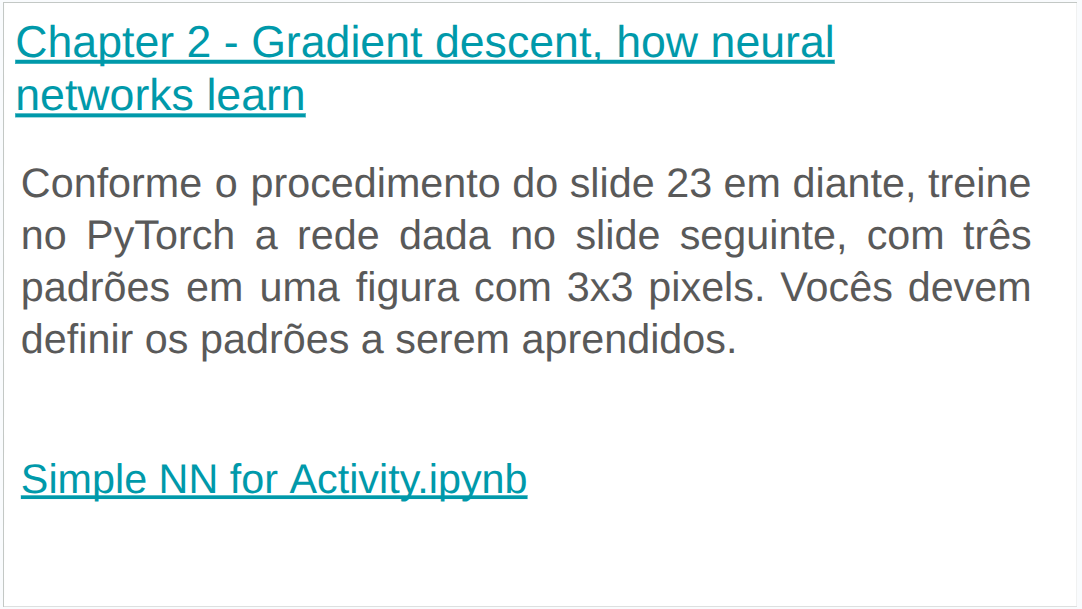

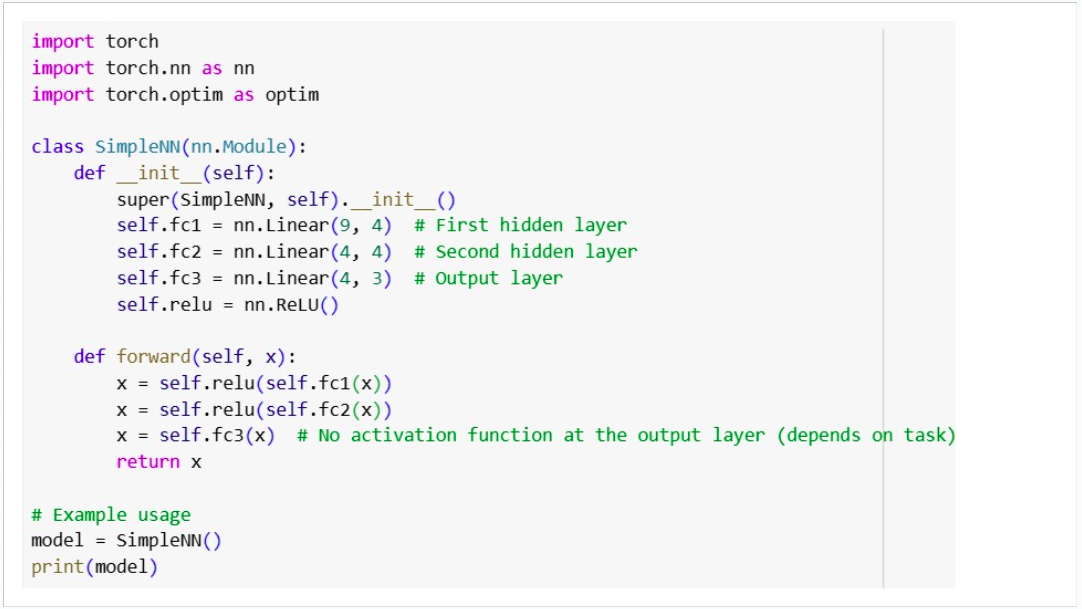

In [59]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/D1.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/D2.png", width=950))
print("")  # Espaço entre as imagens

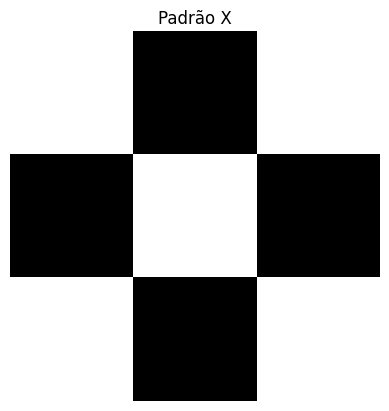

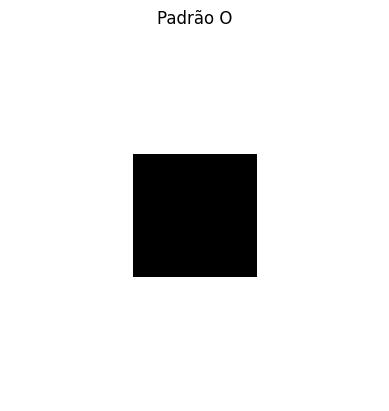

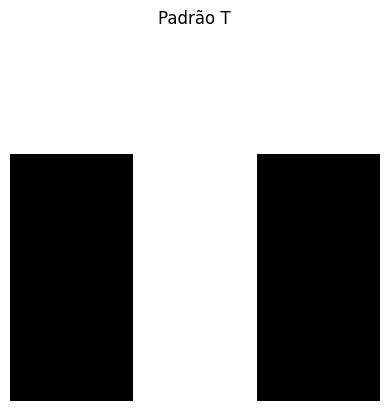

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Definindo os padrões de treinamento (3 padrões 3x3)
pattern_x = torch.tensor([
    [1., 0., 1.],
    [0., 1., 0.],
    [1., 0., 1.]
]).flatten()

pattern_o = torch.tensor([
    [1., 1., 1.],
    [1., 0., 1.],
    [1., 1., 1.]
]).flatten()

pattern_t = torch.tensor([
    [1., 1., 1.],
    [0., 1., 0.],
    [0., 1., 0.]
]).flatten()

# Juntando os padrões em um tensor de treinamento
X_train = torch.stack([pattern_x, pattern_o, pattern_t])

# Rótulos para cada padrão (one-hot encoding)
y_train = torch.tensor([
    [1., 0., 0.],  # X
    [0., 1., 0.],  # O
    [0., 0., 1.]   # T
])

# Visualizando os padrões
def show_pattern(pattern, title):
    plt.imshow(pattern.view(3, 3), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

show_pattern(pattern_x, "Padrão X")
show_pattern(pattern_o, "Padrão O")
show_pattern(pattern_t, "Padrão T")

Epoch [100/1000], Loss: 0.7796
Epoch [200/1000], Loss: 0.5693
Epoch [300/1000], Loss: 0.5164
Epoch [400/1000], Loss: 0.4715
Epoch [500/1000], Loss: 0.3139
Epoch [600/1000], Loss: 0.1840
Epoch [700/1000], Loss: 0.1082
Epoch [800/1000], Loss: 0.0684
Epoch [900/1000], Loss: 0.0475
Epoch [1000/1000], Loss: 0.0359


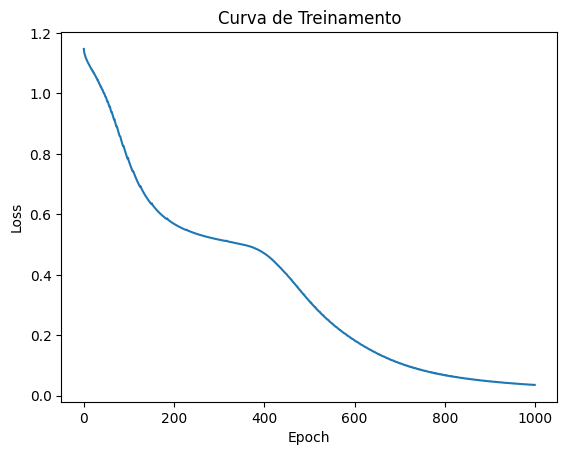

In [73]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(9, 4)  # Primeira camada escondida
        self.fc2 = nn.Linear(4, 4)  # Segunda camada escondida
        self.fc3 = nn.Linear(4, 3)  # Camada de saída
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Sem função de ativação na saída (usaremos CrossEntropyLoss)
        return x

# Instanciando o modelo
model = SimpleNN()

# Definindo a função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Treinamento
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.argmax(dim=1))
    
    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotando a curva de perda
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Curva de Treinamento')
plt.show()

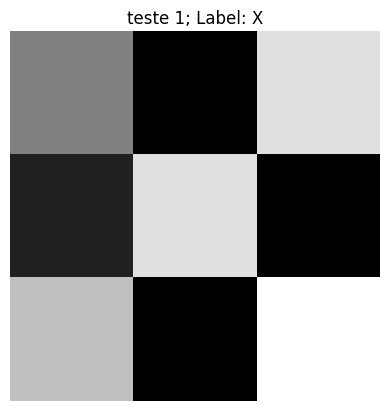

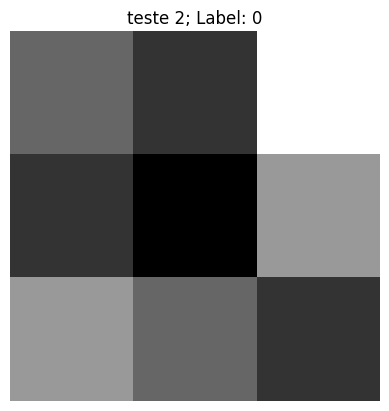

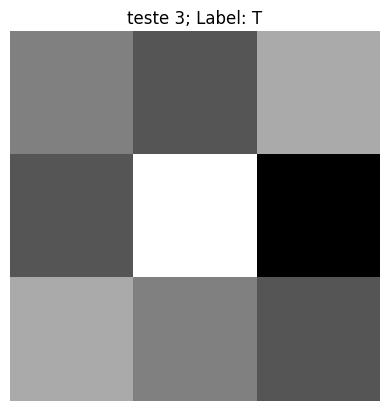


Teste com variação: Predito X

Teste com variação: Predito O

Teste com variação: Predito T


In [79]:
# Testando a rede com os padrões de treinamento
""""
with torch.no_grad():
    outputs = model(X_train)
    _, predicted = torch.max(outputs.data, 1)
    _, labels = torch.max(y_train.data, 1)
    
    print("\nResultados do Teste:")
    for i in range(3):
        pattern_name = ['X', 'O', 'T'][i]
        print(f'Padrão {pattern_name}: Predito {["X", "O", "T"][predicted[i]]}')
    
    # Calculando a acurácia
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    print(f'\nAcurácia: {accuracy * 100:.2f}%')

"""

# Testando com uma variação do padrão X (ruído)
test_pattern = torch.tensor([
    [0.5, 0.1, 0.8],
    [0.2, 0.8, 0.1],
    [0.7, 0.1, 0.9]
]).flatten()

# Testando com uma variação do padrão X (ruído)
test_pattern1 = torch.tensor([
    [0.5, 0.4, 0.8],
    [0.4, 0.3, 0.6],
    [0.6, 0.5, 0.4]
]).flatten()

# Testando com uma variação do padrão X (ruído)
test_pattern2 = torch.tensor([
    [0.5, 0.4, 0.6],
    [0.4, 0.8, 0.2],
    [0.6, 0.5, 0.4]
]).flatten()

# Visualizando os padrões
def show_pattern(pattern, title):
    plt.imshow(pattern.view(3, 3), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

show_pattern(test_pattern, "teste 1; Label: X")
show_pattern(test_pattern1, "teste 2; Label: 0")
show_pattern(test_pattern2, "teste 3; Label: T")

with torch.no_grad():
    output = model(test_pattern.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)
    print(f'\nTeste com variação: Predito {["X", "O", "T"][predicted.item()]}')

    output = model(test_pattern1.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)
    print(f'\nTeste com variação: Predito {["X", "O", "T"][predicted.item()]}')

    output = model(test_pattern2.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)
    print(f'\nTeste com variação: Predito {["X", "O", "T"][predicted.item()]}')

### Conclusão

Conforme solicitado no enunciado da questão, foram apresentados três padrões para a rede aprender, utilizando imagens de 3×3 pixels. Os padrões definidos foram: O, X e T. A rede foi treinada para classificar corretamente esses padrões e, ao final dos testes, demonstrou ser capaz de predizer os rótulos (labels) corretamente para os três alvos. Além disso, observando o gráfico de perda por épocas, nota-se que a rede conseguiu minimizar significativamente a função de perda entre as épocas 800 e 1000, indicando uma boa convergência do treinamento.

# Atividade E

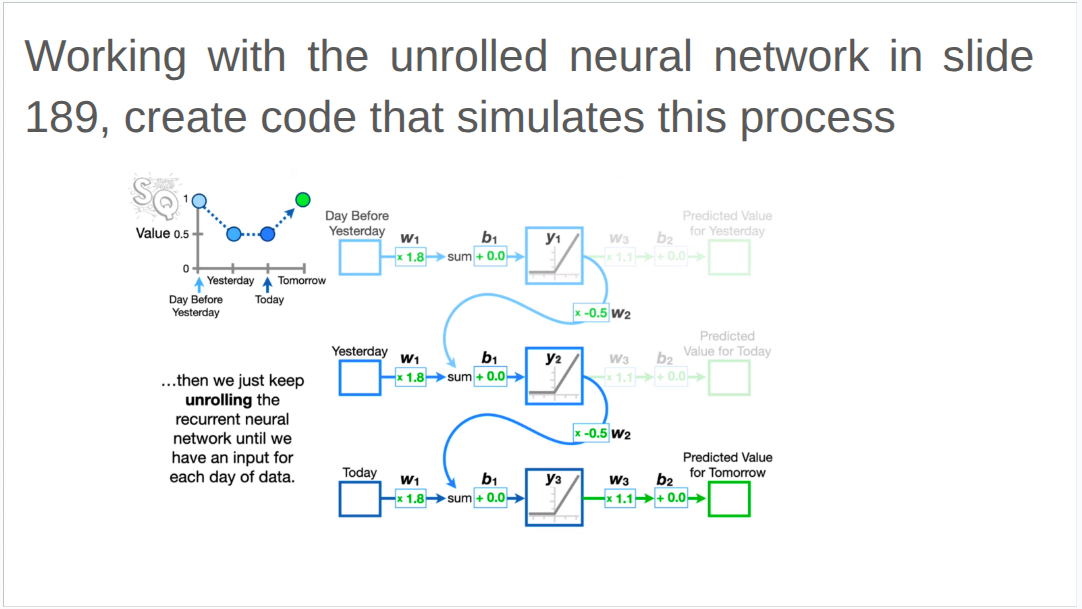

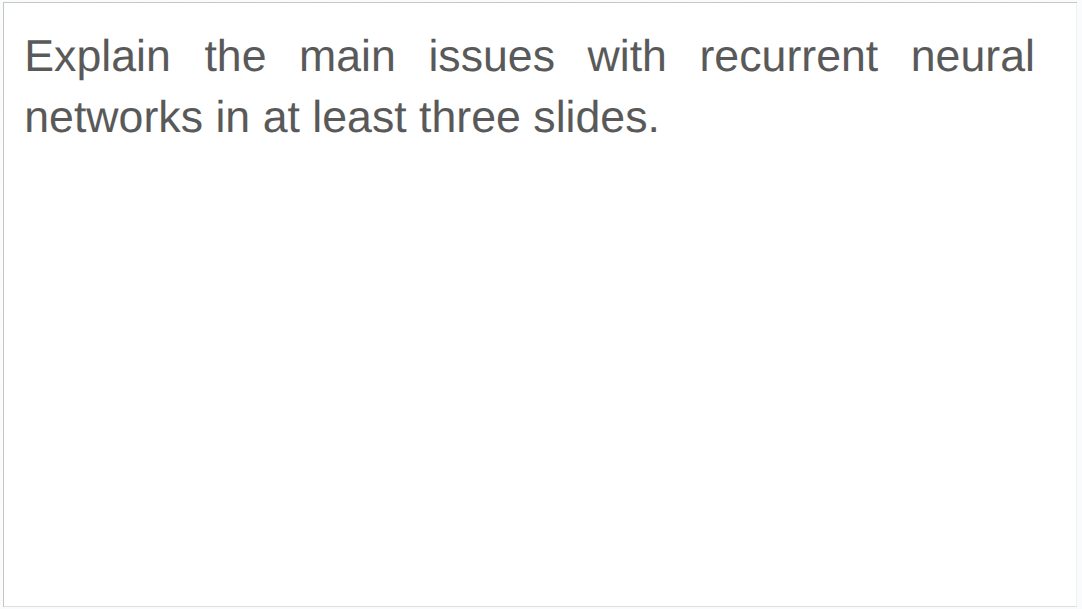

In [62]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/E1.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/E2.png", width=950))
print("")  # Espaço entre as imagens

Epoch [100/1000], Loss: 0.1462
Epoch [200/1000], Loss: 0.1143
Epoch [300/1000], Loss: 0.0612
Epoch [400/1000], Loss: 0.0007
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0001


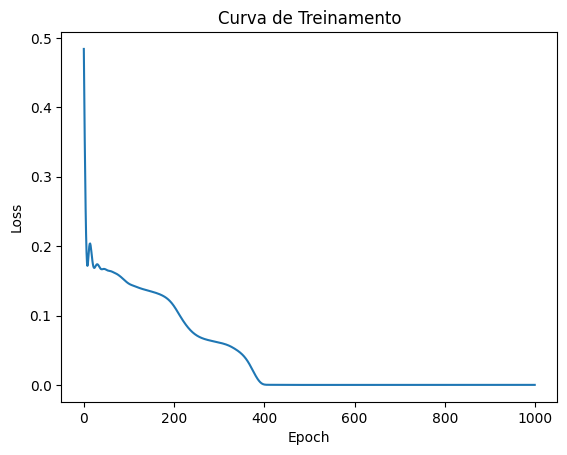

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo (expandidos para ter mais amostras)
# Cada linha: [anteontem, ontem, hoje] -> amanhã
data = [
    [1.0, 0.5, 0.5, 1.0],    # Seu exemplo
    [0.5, 0.5, 1.0, 0.2],    # Novo padrão
    [0.5, 1.0, 0.2, 0.8],    # Novo padrão
    [1.0, 0.2, 0.8, 1.5],    # Novo padrão
    [0.2, 0.8, 1.5, 1.2],    # Novo padrão
    [0.8, 1.5, 1.2, 0.7]     # Novo padrão
]

# Separando em features (X) e target (y)
X = torch.tensor([d[:3] for d in data]).float()
y = torch.tensor([d[3] for d in data]).float().view(-1, 1)

# Hiperparâmetros
input_size = 1   # Cada valor é um número único
hidden_size = 4  # Tamanho do estado oculto
output_size = 1  # Previsão de um único valor
learning_rate = 0.01
epochs = 1000

# Definindo a RNN desenrolada manualmente
class UnrolledRNN(nn.Module):
    def __init__(self):
        super(UnrolledRNN, self).__init__()
        # Camadas compartilhadas (mesmos pesos para todos os passos)
        self.rnn_cell = nn.RNNCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # x shape: (batch_size, seq_len=3)
        # Queremos processar cada passo temporal (3 passos)
        
        # Inicializando o estado oculto
        h = torch.zeros(x.size(0), hidden_size)
        
        # Desenrolando manualmente a RNN para 3 passos de tempo
        # Passo 1: anteontem
        h = self.rnn_cell(x[:, 0].unsqueeze(1), h)
        
        # Passo 2: ontem
        h = self.rnn_cell(x[:, 1].unsqueeze(1), h)
        
        # Passo 3: hoje
        h = self.rnn_cell(x[:, 2].unsqueeze(1), h)
        
        # Após processar toda a sequência, fazemos a previsão
        out = self.fc(h)
        return out

# Instanciando o modelo
model = UnrolledRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Treinamento
losses = []
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotando a curva de perda
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Curva de Treinamento')
plt.show()


In [84]:
# Testando com seu exemplo específico
#test_input = torch.tensor([[1.0, 0.5, 0.5]]).float()
with torch.no_grad():
    # Testando com seu exemplo específico
    test_input = torch.tensor([[1.0, 0.5, 0.5]]).float()
    test_input1 = torch.tensor([[0.25, 0.5, 0.75]]).float()
    test_input2 = torch.tensor([[0.5, 0.5, 0.5]]).float()

    predicted = model(test_input)
    print(f"\nPrevisão para amanhã (entrada: [1.0, 0.5, 0.5]): {predicted.item():.4f}")

    predicted1 = model(test_input1)
    print(f"\nPrevisão para amanhã (entrada: [1.0, 0.5, 0.5]): {predicted1.item():.4f}")

    predicted2 = model(test_input2)
    print(f"\nPrevisão para amanhã (entrada: [1.0, 0.5, 0.5]): {predicted2.item():.4f}")

# Testando com todos os exemplos
print("\nTestando com todos os exemplos:")
with torch.no_grad():
    for i in range(len(X)):
        prediction = model(X[i].unsqueeze(0))
        print(f"Entrada: {X[i].numpy()}, Real: {y[i].item():.2f}, Predito: {prediction.item():.2f}")


Previsão para amanhã (entrada: [1.0, 0.5, 0.5]): 1.0204

Previsão para amanhã (entrada: [1.0, 0.5, 0.5]): 0.4503

Previsão para amanhã (entrada: [1.0, 0.5, 0.5]): 0.3724

Testando com todos os exemplos:
Entrada: [1.  0.5 0.5], Real: 1.00, Predito: 1.02
Entrada: [0.5 0.5 1. ], Real: 0.20, Predito: 0.20
Entrada: [0.5 1.  0.2], Real: 0.80, Predito: 0.80
Entrada: [1.  0.2 0.8], Real: 1.50, Predito: 1.50
Entrada: [0.2 0.8 1.5], Real: 1.20, Predito: 1.20
Entrada: [0.8 1.5 1.2], Real: 0.70, Predito: 0.70


---

### Slide 1: Introdução às Redes Neurais Recorrentes (RNNs)

### O Problema das Redes Neurais Tradicionais com Sequências

- **Redes Neurais Feedforward (MLPs) são "cegas" ao tempo:** Uma rede neural feedforward típica processa cada entrada de forma independente. Por exemplo, se você fornecer as palavras "Eu", "não", "gosto" e "de" separadamente, ela não conseguirá reconhecer que essas palavras formam uma frase com ordem e significado específicos.
- **A Importância da Ordem:** Em muitos tipos de dados — como texto, áudio ou séries temporais — a ordem dos elementos é essencial para o seu significado. "Eu gosto de maçãs" não é o mesmo que "Maçãs gosto de eu".
- **Limitação de Memória:** MLPs não possuem mecanismos para armazenar informações de entradas anteriores.

### A Solução das RNNs: Incorporando a Memória

- **RNNs são projetadas para processar sequências de dados:** Elas lidam com entradas e saídas de comprimentos variáveis.
- **Conexões Recorrentes:** A principal característica das RNNs é a presença de conexões de feedback — ou "recorrência". A saída de um passo de tempo é usada como entrada para o próximo.
- **"Memória de Curto Prazo":** Essa estrutura permite que a rede mantenha um **estado oculto** (*hidden state*) que captura informações sobre elementos anteriores da sequência.

---
### Slide 2: O Mecanismo Fundamental de uma RNN

### O Processo Passo a Passo

Dada uma sequência de entradas $((x_1, x_2, ..., x_t, ...)$), o modelo produz saídas $((h_1, h_2, ..., h_t, ...)$).

1. **Entrada no tempo $( t $):** A RNN recebe o elemento atual da sequência $( x_t $).
2. **Estado oculto anterior $( h_{t-1} $):** Armazena o que foi aprendido até o passo anterior. Para $( t = 0 $), geralmente $( h_0 = 0 $).
3. **Cálculo do novo estado oculto $( h_t $):**  
   $$
   h_t = \text{função\_ativação}(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
   $$
   - $( W_{xh} $): pesos da entrada
   - $( W_{hh} $): pesos da recorrência
   - $( b_h $): bias
4. **Cálculo da saída $( y_t $) (opcional):**  
   $$
   y_t = \text{função\_ativação}(W_{hy}h_t + b_y)
   $$

 Todos os pesos e biases são **compartilhados** entre os passos de tempo.

### Desdobramento (Unrolling) da RNN

A RNN pode ser vista como uma rede muito profunda ao longo do tempo, onde cada "camada" representa um passo temporal. O treinamento é feito usando **Backpropagation Through Time (BPTT)** para propagar os gradientes por todos os passos.

---


## Slide 3: Limitações e Evolução das RNNs

### O Desafio da Memória de Longo Prazo

- **Vanishing Gradient:** Em sequências longas, os gradientes se tornam muito pequenos durante o BPTT, dificultando o aprendizado de dependências distantes.
- **Exploding Gradient:** O gradiente pode crescer exponencialmente, tornando o treinamento instável. Uma técnica comum para lidar com isso é o *gradient clipping*.

### A Evolução: LSTMs e GRUs

- **LSTM (Long Short-Term Memory):**
  - Introduz portões: *Input*, *Forget* e *Output*.
  - Usa uma *cell state* como memória de longo prazo.
  - Capaz de aprender dependências distantes com mais eficácia.

- **GRU (Gated Recurrent Unit):**
  - Estrutura mais simples com *Update* e *Reset* gates.
  - Menos parâmetros, treinamento mais rápido, desempenho competitivo com LSTMs.

### Além das RNNs: O Futuro com Transformers

- **Transformers** abandonam a recorrência e usam mecanismos de atenção.
- Permitem paralelismo total no treinamento.
- Superaram as RNNs em várias tarefas de PLN.
- Ainda assim, RNNs são úteis em contextos com forte dependência temporal ou restrições de memória.

---

### conclusão

A rede neural recorrente foi capaz de realizar a predição do próximo número da sequência corretamente, conforme demonstrado nos slides. O modelo aprendeu o padrão apresentado e conseguiu generalizar o comportamento esperado durante a inferência.

# Atividade F

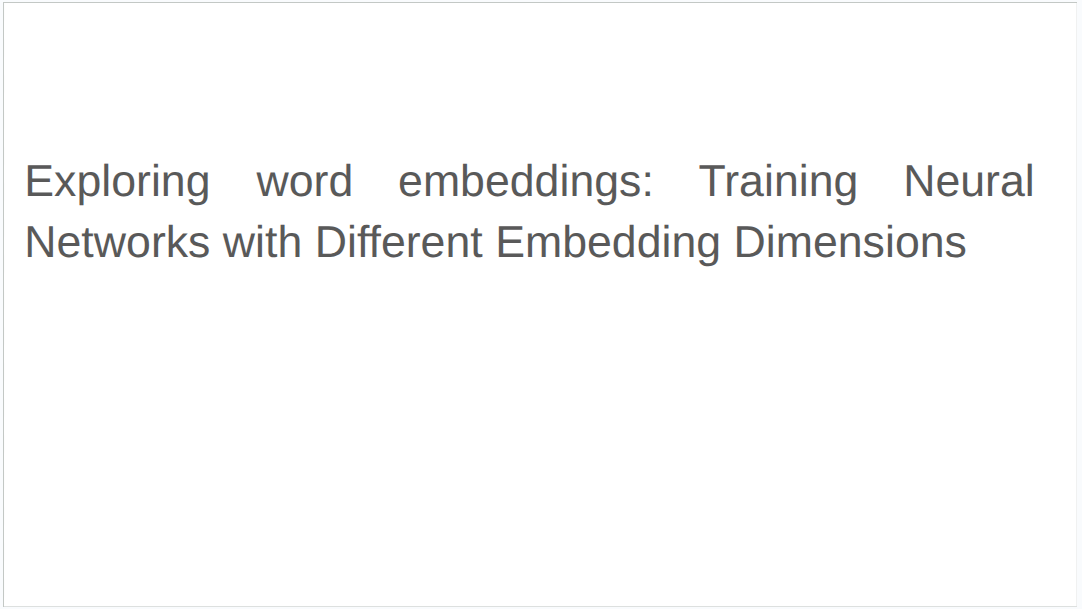

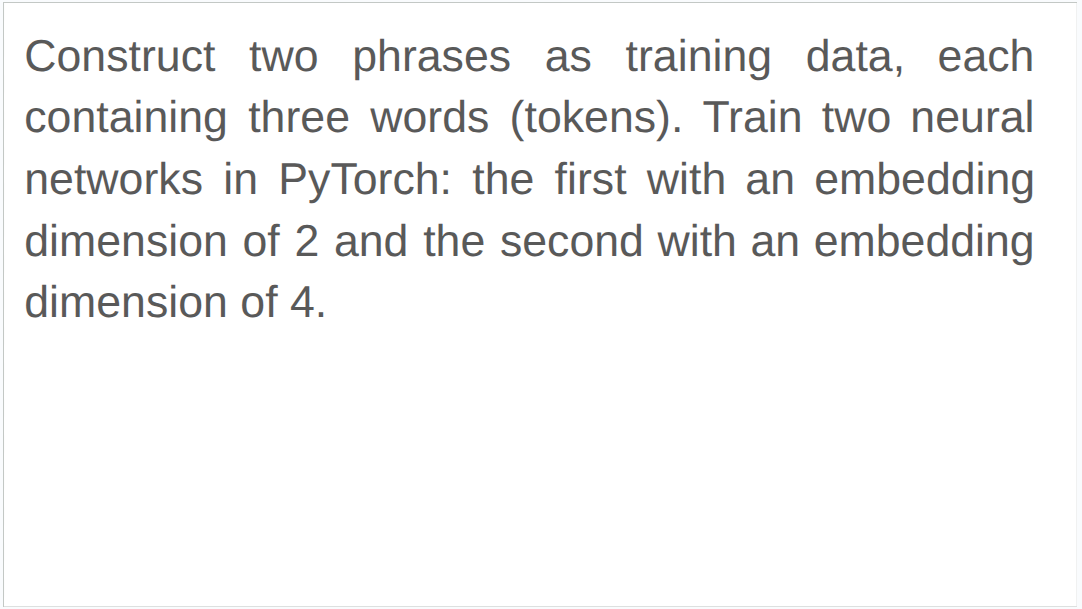

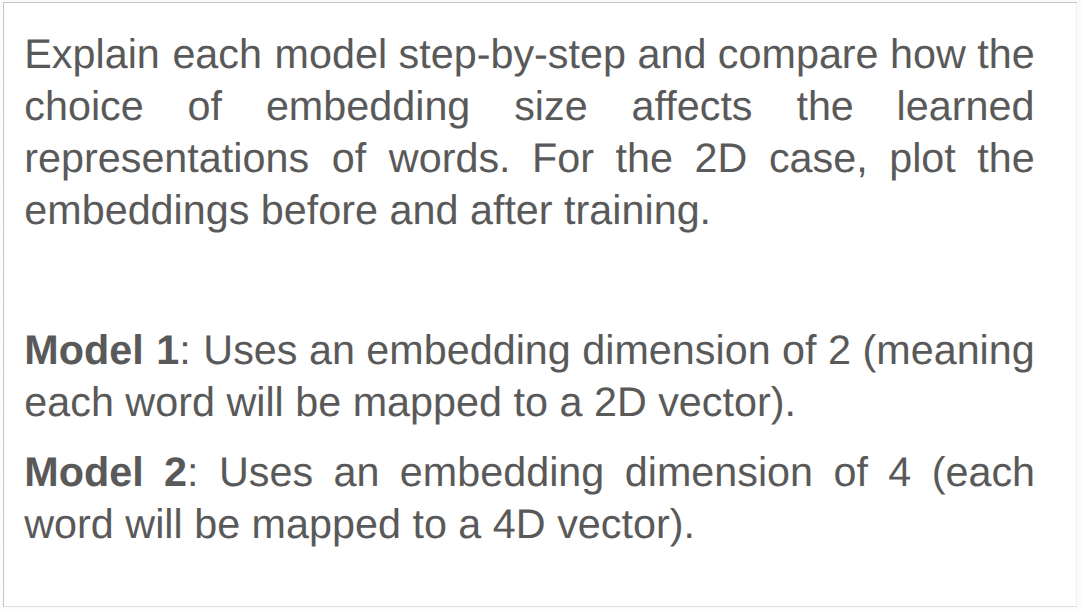

In [63]:
# Exibe a segunda imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/F1.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/F2.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/home/cassiosilva/Imagens/Tarefa 3.2/F3.png", width=950))
print("")  # Espaço entre as imagens

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Definindo os dados de treinamento (2 frases com 3 palavras cada)
frases = [
    ["gato", "persegue", "rato"],
    ["cachorro", "brinca", "bola"]
]

# Criando o vocabulário
vocabulario = {palavra: idx for idx, palavra in enumerate(set([palavra for frase in frases for palavra in frase]))}
tamanho_vocabulario = len(vocabulario)
print("Vocabulário:", vocabulario)

Vocabulário: {'rato': 0, 'brinca': 1, 'cachorro': 2, 'gato': 3, 'persegue': 4, 'bola': 5}



Embeddings iniciais (2D):
rato: [ 1.0787163 -1.0554458]
brinca: [2.1022797  0.00383418]
cachorro: [-0.8692552  -0.42361754]
gato: [0.8578294 1.7394631]
persegue: [ 0.00376674 -1.4944091 ]
bola: [1.1089802  0.25635582]

Embeddings após treinamento (2D):
rato: [ 1.0787163 -1.0554458]
brinca: [ 3.7802837 -1.6761001]
cachorro: [ 0.8087502 -2.1035526]
gato: [-0.30372784  4.1880536 ]
persegue: [-1.1577903  0.9541819]
bola: [1.1089802  0.25635582]


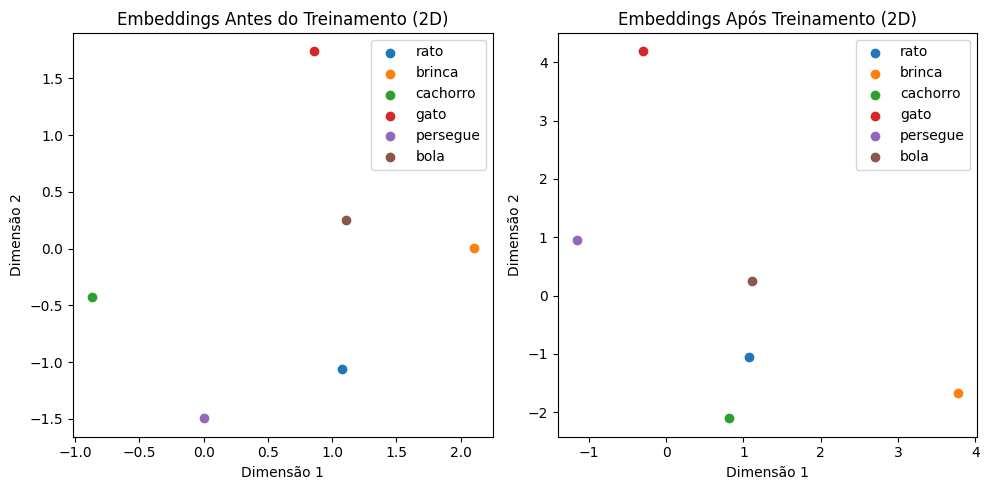

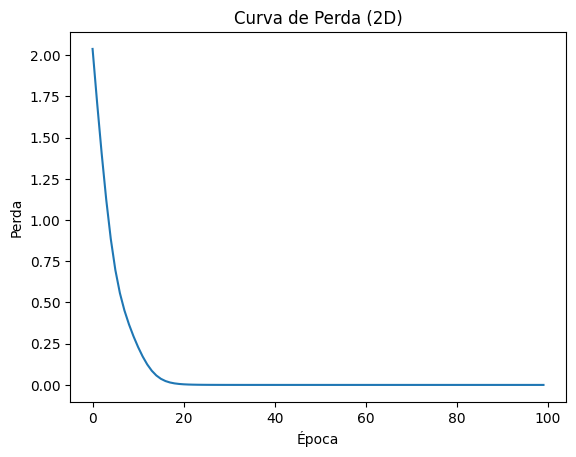

In [91]:
    class ModeloEmbedding2D(nn.Module):
        def __init__(self, vocab_size, embed_dim=2):
            super(ModeloEmbedding2D, self).__init__()
            self.embedding = nn.Embedding(vocab_size, embed_dim)
            self.fc = nn.Linear(embed_dim, vocab_size)  # Camada para prever a próxima palavra
            
        def forward(self, x):
            embedded = self.embedding(x)
            # Média dos embeddings das palavras de entrada
            avg_embedded = torch.mean(embedded, dim=1)
            output = self.fc(avg_embedded)
            return output, embedded

    # Preparando os dados de treinamento
    dados_treinamento = []
    for frase in frases:
        # Criando pares (palavra1, palavra2) -> palavra3
        dados_treinamento.append(([vocabulario[frase[0]], vocabulario[frase[1]]], vocabulario[frase[2]]))

    # Convertendo para tensores
    X = torch.tensor([[par[0][0], par[0][1]] for par in dados_treinamento])
    y = torch.tensor([par[1] for par in dados_treinamento])

    # Instanciando o modelo
    modelo_2d = ModeloEmbedding2D(tamanho_vocabulario, embed_dim=2)

    # Visualizando embeddings antes do treinamento
    embeddings_iniciais = modelo_2d.embedding.weight.detach().numpy()
    print("\nEmbeddings iniciais (2D):")
    for palavra, idx in vocabulario.items():
        print(f"{palavra}: {embeddings_iniciais[idx]}")

    # Plotando embeddings iniciais (2D)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    for palavra, idx in vocabulario.items():
        plt.scatter(embeddings_iniciais[idx, 0], embeddings_iniciais[idx, 1], label=palavra)
    plt.title("Embeddings Antes do Treinamento (2D)")
    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")
    plt.legend()

    # Treinamento
    criterio = nn.CrossEntropyLoss()
    otimizador = optim.Adam(modelo_2d.parameters(), lr=0.1)

    epochs = 100
    perdas = []

    for epoch in range(epochs):
        otimizador.zero_grad()
        saida, _ = modelo_2d(X)
        perda = criterio(saida, y)
        perda.backward()
        otimizador.step()
        perdas.append(perda.item())

    # Visualizando embeddings após o treinamento
    embeddings_treinados = modelo_2d.embedding.weight.detach().numpy()
    print("\nEmbeddings após treinamento (2D):")
    for palavra, idx in vocabulario.items():
        print(f"{palavra}: {embeddings_treinados[idx]}")

    # Plotando embeddings após treinamento (2D)
    plt.subplot(1, 2, 2)
    for palavra, idx in vocabulario.items():
        plt.scatter(embeddings_treinados[idx, 0], embeddings_treinados[idx, 1], label=palavra)
    plt.title("Embeddings Após Treinamento (2D)")
    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plotando curva de perda
    plt.plot(perdas)
    plt.title("Curva de Perda (2D)")
    plt.xlabel("Época")
    plt.ylabel("Perda")
    plt.show()

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dados de treinamento
sentences = [
    [0, 1, 2],  # "gato come peixe"
    [3, 4, 5]   # "cachorro late alto"
]

# Hiperparâmetros
vocab_size = 6    # Tamanho do vocabulário
embedding_dim = 4  # Dimensão da embedding
context_size = 2   # Palavras de contexto (para modelo de linguagem simples)

# Convertendo para tensor
data = torch.tensor(sentences, dtype=torch.long)

# Modelo: Embedding Simples
class WordEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, x):
        return self.embeddings(x)

# Instanciando o modelo
model = WordEmbeddingModel(vocab_size, embedding_dim)

# Otimizador e função de perda
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()  # Exemplo: queremos aprender embeddings arbitrários

# Dummy target (apenas para exemplo)
target = torch.randn((2, 3, embedding_dim))  # Formato: (batch_size, seq_len, embedding_dim)

# Treinamento
for epoch in range(100):
    optimizer.zero_grad()
    embeddings = model(data)
    loss = loss_fn(embeddings, target)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Época {epoch}, Loss: {loss.item():.4f}")

# Embeddings finais
print("\nEmbeddings aprendidos:")
for word, idx in {"gato": 0, "come": 1, "peixe": 2, "cachorro": 3, "late": 4, "alto": 5}.items():
    embedding = model.embeddings(torch.tensor(idx)).detach().numpy()
    print(f"{word}: {embedding}")

Época 0, Loss: 1.9986
Época 10, Loss: 1.6906
Época 20, Loss: 1.4300
Época 30, Loss: 1.2096
Época 40, Loss: 1.0232
Época 50, Loss: 0.8655
Época 60, Loss: 0.7322
Época 70, Loss: 0.6193
Época 80, Loss: 0.5239
Época 90, Loss: 0.4431

Embeddings aprendidos:
gato: [-1.2061126   1.3059311   1.1020386  -0.43906742]
come: [-0.32545334 -0.6656683   0.44630063 -0.4487927 ]
peixe: [ 0.12296174  0.11258994  0.21029362 -0.76529545]
cachorro: [ 1.2994009  -0.7395157  -0.29121962  0.19567706]
late: [-0.24293604 -0.74866235  0.94645196 -0.22713143]
alto: [-0.07737455 -1.3222024  -0.37366882  0.4427662 ]


### 🔧 Etapa 1: Definição da arquitetura `ModeloEmbedding2D`

A classe `ModeloEmbedding2D` define uma rede neural com duas partes principais:

### 🔹 `__init__` (inicialização do modelo)

* **`nn.Embedding(vocab_size, embed_dim)`**:  
  Cria uma camada que associa a cada palavra do vocabulário um vetor em 2D (`embed_dim = 2`).  
  Exemplo: `"gato"` → `[0.12, -0.35]`.

* **`nn.Linear(embed_dim, vocab_size)`**:  
  Cria uma camada densa que transforma o vetor médio das palavras de entrada em uma predição da próxima palavra (classificação entre todas as palavras do vocabulário).

### 🔹 `forward(x)` (passo direto no modelo)

* Recebe `x`, um lote de pares de palavras (ex: "gato", "persegue").
* Passa essas palavras pela camada de embedding → transforma em vetores 2D.
* Calcula a **média vetorial** desses embeddings → representa o contexto da frase.
* Usa a camada linear para gerar uma **distribuição de probabilidade** (logits) sobre o vocabulário → previsão da próxima palavra.

---

### 🧪 Etapa 2: Preparação dos dados de treinamento

* Para cada frase com 3 palavras (ex: `"gato persegue rato"`), cria-se um par:

  - Entrada: os índices das duas primeiras palavras.
  - Saída: o índice da terceira palavra (alvo a ser previsto).

* Esses pares são convertidos em tensores PyTorch:

  - `X`: tensor com pares de índices de palavras (entrada).
  - `y`: tensor com os índices da palavra-alvo (saída esperada).

---

### 🔍 Etapa 3: Visualização dos embeddings antes do treinamento

* Os vetores de palavras (embeddings) são inicializados aleatoriamente.
* São extraídos com `.embedding.weight.detach().numpy()`.
* Um gráfico 2D mostra onde cada palavra está posicionada no espaço vetorial antes de qualquer aprendizado.

---

### 🎯 Etapa 4: Treinamento do modelo

### 🔸 Componentes do treinamento:

* **`nn.CrossEntropyLoss()`**: mede o erro entre a saída da rede (logits) e o rótulo correto (palavra-alvo).
* **`optim.Adam(...)`**: algoritmo de otimização que ajusta os pesos (e embeddings) com base no gradiente do erro.

### 🔸 Loop de treinamento:

Para 100 épocas:

1. Zera os gradientes acumulados.
2. Passa os dados pela rede (`forward`).
3. Calcula a perda com `CrossEntropyLoss`.
4. Realiza retropropagação (`backward()`).
5. Atualiza os parâmetros com `step()`.
6. Armazena a perda da época.

✅ Resultado: os embeddings das palavras são ajustados para que, ao combinar duas palavras, a rede consiga prever a terceira.

---

### 🎨 Etapa 5: Visualização dos embeddings após o treinamento

* Após o treinamento, os embeddings foram ajustados com base no contexto em que as palavras aparecem.
* Um novo gráfico mostra a nova posição vetorial de cada palavra.
* Espera-se que palavras que aparecem juntas (ex: "gato" e "persegue") fiquem próximas.

---

### 📉 Etapa 6: Curva de perda

* Um gráfico da função de perda ao longo das épocas mostra a evolução do aprendizado.
* Se a curva desce suavemente, é sinal de que a rede está aprendendo de forma estável.

---

### ✅ Conclusão do modelo

Este pequeno experimento mostra como:

* Um modelo simples pode **aprender significados vetoriais** para palavras com base no contexto.
* A rede neural ajusta os **embeddings** para que palavras com **relações semelhantes** fiquem **mais próximas no espaço vetorial**.
* Mesmo com poucas frases e poucas palavras, a ideia central do **Word2Vec** e do aprendizado de representações é demonstrada com clareza.


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# 1. Dados de Exemplo (2 frases)
sentences = [
    ["gato", "come", "peixe"],  # Sequência 1
    ["cachorro", "late", "alto"]  # Sequência 2
]

# 2. Criar vocabulário
vocab = {word: idx for idx, word in enumerate(set(word for sentence in sentences for word in sentence))}
vocab_size = len(vocab)
print("Vocabulário:", vocab)

# 3. Preparar pares (input, target) para treino
# Exemplo: "gato" → "come", "come" → "peixe"
data = []
for sentence in sentences:
    for i in range(len(sentence)-1):
        input_word = sentence[i]
        target_word = sentence[i+1]
        data.append((vocab[input_word], vocab[target_word]))

# 4. Classe Dataset
class WordDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0]), torch.tensor(self.data[idx][1])

# 5. Modelo de Linguagem
class NextWordModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)
    
    def forward(self, x):
        x = self.embedding(x)  # Transforma índices em embeddings
        x = self.linear(x)     # Prediz o logit da próxima palavra
        return x

# 6. Hiperparâmetros
embedding_dim = 4
learning_rate = 0.1
epochs = 100

# 7. Instanciar modelo, loss e otimizador
model = NextWordModel(vocab_size, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
dataloader = DataLoader(WordDataset(data), batch_size=2, shuffle=True)

# 8. Treinamento
for epoch in range(epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}, Loss: {total_loss/len(dataloader):.4f}")

# 9. Testar o modelo
model.eval()
with torch.no_grad():
    test_words = ["gato", "cachorro"]
    for word in test_words:
        input_idx = torch.tensor([vocab[word]])
        logits = model(input_idx)
        probs = torch.softmax(logits, dim=1)
        
        print(f"\nPróximas palavras para '{word}':")
        for word_in_vocab, idx in vocab.items():
            print(f"{word_in_vocab}: {probs[0][idx].item()*100:.2f}%")

Vocabulário: {'cachorro': 0, 'come': 1, 'gato': 2, 'late': 3, 'alto': 4, 'peixe': 5}
Época 10, Loss: 0.8089
Época 20, Loss: 0.2972
Época 30, Loss: 0.1446
Época 40, Loss: 0.0878
Época 50, Loss: 0.0609
Época 60, Loss: 0.0458
Época 70, Loss: 0.0362
Época 80, Loss: 0.0298
Época 90, Loss: 0.0252
Época 100, Loss: 0.0217

Próximas palavras para 'gato':
cachorro: 0.36%
come: 98.31%
gato: 0.10%
late: 0.51%
alto: 0.69%
peixe: 0.03%

Próximas palavras para 'cachorro':
cachorro: 0.55%
come: 0.59%
gato: 0.78%
late: 97.51%
alto: 0.33%
peixe: 0.25%
